In [113]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

To begin with lets create some variables for our world:

In [177]:
n = 2000       # Number of people
p = 0.5        # Probability that an event will be negative
t = 80         # The number of time steps to simulate
s = 10         # Starting value of each persons success

evn_i = 0.08   # Probability of event happening to a person
tal_x = 0.6    # The mean of our talents
tal_s = 0.1    # The standard deviation of our talents

Let's begin by creating a distribution of talents using our people, mean and standard deviation. We then plot this distribution:

In [178]:
peoples_talents = np.random.normal(tal_x, tal_s, n)

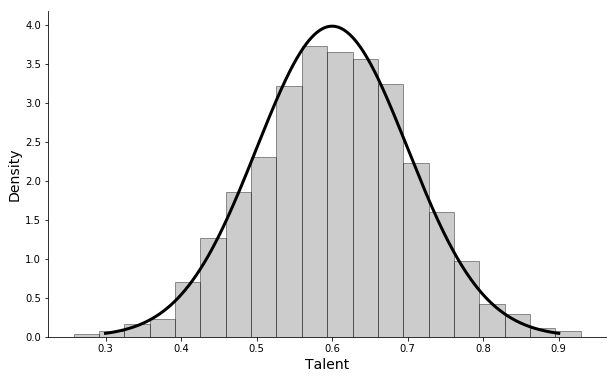

In [179]:
bins = 20
# Plot a histogram of our talents
fig = plt.figure(figsize=(10,6))
plt.hist(peoples_talents, bins, color='grey', edgecolor='k', density=True, alpha=0.4)
# Normal distribution plot using our talent variables
x = np.linspace(tal_x - 3*tal_s, tal_x + 3*tal_s, 500)
plt.plot(x, scipy.stats.norm.pdf(x, tal_x, tal_s),
         linewidth=3, color='k')
plt.xlabel("Talent", fontsize=14)
plt.ylabel("Density", fontsize=14)
sns.despine()
plt.show()

Next we create a matrix to hold our data

In [242]:
# Create a 2D array of people over time
world = np.zeros((n,t+1))

# Change each persons initial success to 10
world[:,0] = s * 1.0

# Iterate through each time step (0 is the initial state)
for i in range(1,t+1):
    # Creates an array of random events occurring
    does_an_event_occur = np.random.binomial(n=1, p=evn_i, size=n)
    
    # Array of good or bad occurence
    is_an_event_bad = np.random.binomial(n=1, p=p, size=n) * 1.0
    is_an_event_bad[:] = [2 if x != 1 else 0.5 for x in is_an_event_bad]
    
    # Combine the two arrays
    event_impact = does_an_event_occur * is_an_event_bad 
    event_impact[:] = [x if x != 0 else 1 for x in event_impact]
    
    # Factoring in talents to positive events
    advantage = peoples_talents - np.random.rand(n)
    advantage = [1 if x > 0 else 0 for x in advantage]
    i_talent = [1 if (i == 2) & (j == 0) else i for i, j in zip(event_impact, advantage)]
    
    # Taking the value before, multiply by the event impact
    world[:,i] = world[:,i-1] * i_talent

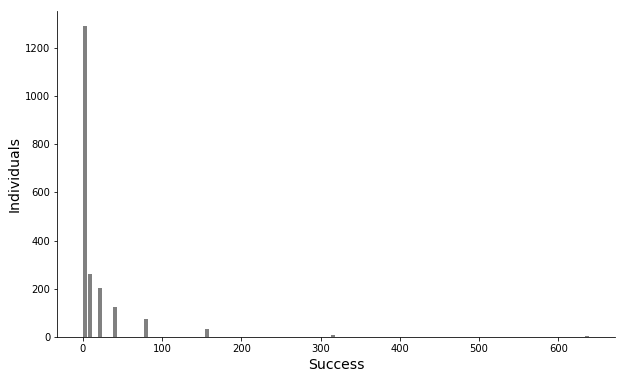

In [243]:
fig = plt.figure(figsize=(10,6))
plt.hist(world[:,t], bins=100, width=5, color='grey')
sns.despine()
plt.xlabel("Success", fontsize=14)
plt.ylabel("Individuals", fontsize=14)
plt.show()

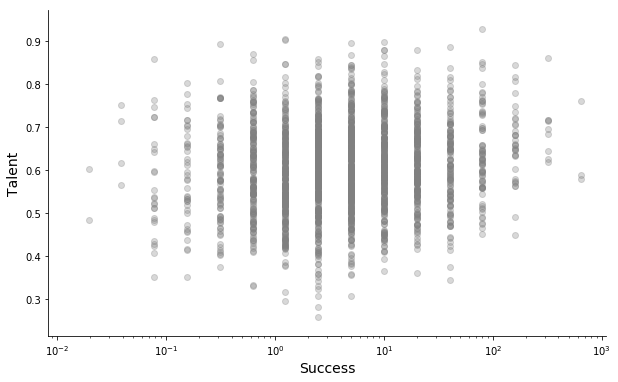

In [274]:
fig = plt.figure(figsize=(10,6))
plt.scatter(world[:,t], peoples_talents, color='grey', alpha=0.3)
plt.xscale('log')
sns.despine()
plt.xlabel("Success", fontsize=14)
plt.ylabel("Talent", fontsize=14)
plt.show()

### Top percentage success accumulation

In [258]:
total_success = world[:,t].sum()

end_success = world[:,t]
end_success = sorted(end_success)

percent_num = 0.2
percent_val = int(n-(n*percent_num))

top_percent = sum(end_success[percent_val:])
top_percent_success = round((top_percent/total_success),2)
print(top_percent_success)

0.78


### Top Talent success average

In [272]:
talent_top = np.where(peoples_talents >= 0.7)
talent_low = np.where(peoples_talents <  0.7)

talent_top_success = [world[i,t] for i in talent_top[0]]
talent_low_success = [world[i,t] for i in talent_low[0]]

average_top_talent = sum(talent_top_success) / len(talent_top[0])
average_low_talent = sum(talent_low_success) / len(talent_low[0])
print(average_top_talent, average_low_talent)

21.857834507042252 14.076628989361701


### High and Low people examples

In [249]:
high_end = np.where(world[:,t] == world[:,t].max())
low_end  = np.where(world[:,t] == world[:,t].min())

0.4829643111407519


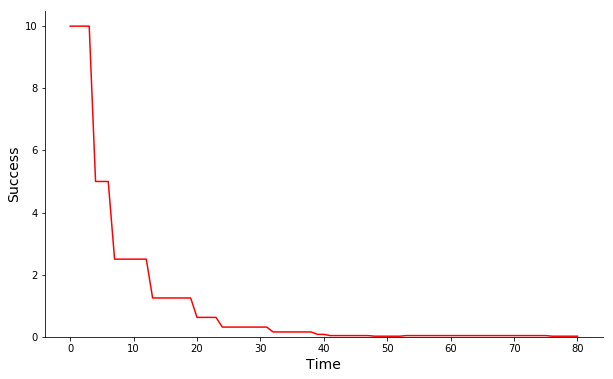

In [254]:
idd = low_end[0][0]
idd_timeline = world[idd,]
print(peoples_talents[idd])

fig = plt.figure(figsize=(10,6))
plt.plot(idd_timeline, color='r')
sns.despine()
plt.xlabel("Time", fontsize=14)
plt.ylabel("Success", fontsize=14)
plt.ylim(0,)
plt.show()

0.5892199971279627


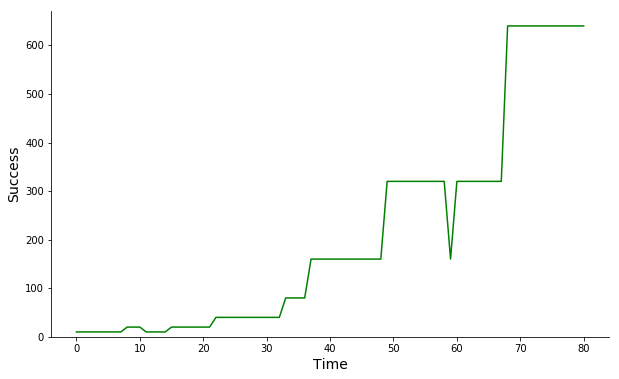

In [256]:
idd = high_end[0][0]
idd_timeline = world[idd,]
print(peoples_talents[idd])

fig = plt.figure(figsize=(10,6))
plt.plot(idd_timeline, color='g')
sns.despine()
plt.xlabel("Time", fontsize=14)
plt.ylabel("Success", fontsize=14)
plt.ylim(0,)
plt.show()